In [14]:
#titanic Prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [15]:
df=pd.read_csv(r'C:\Users\sakth\Downloads\titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket',], axis=1)

# Fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df[['Age', 'Embarked']] = imputer.fit_transform(df[['Age', 'Embarked']])

# Convert categorical data to numerical data
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

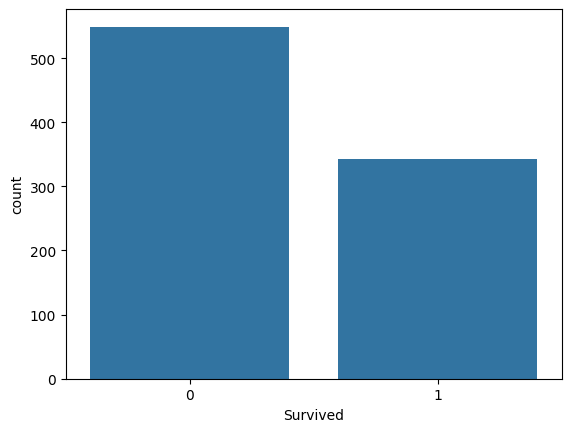

In [22]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived', data=df)
plt.show()

In [23]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2


In [24]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=2)
model.fit(X_train, y_train)




RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2)

In [26]:
# Get feature importances
importances = model.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame to find out the most important features
feature_importances = feature_importances.sort_values('importance', ascending=False)


In [27]:
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.8156424581005587


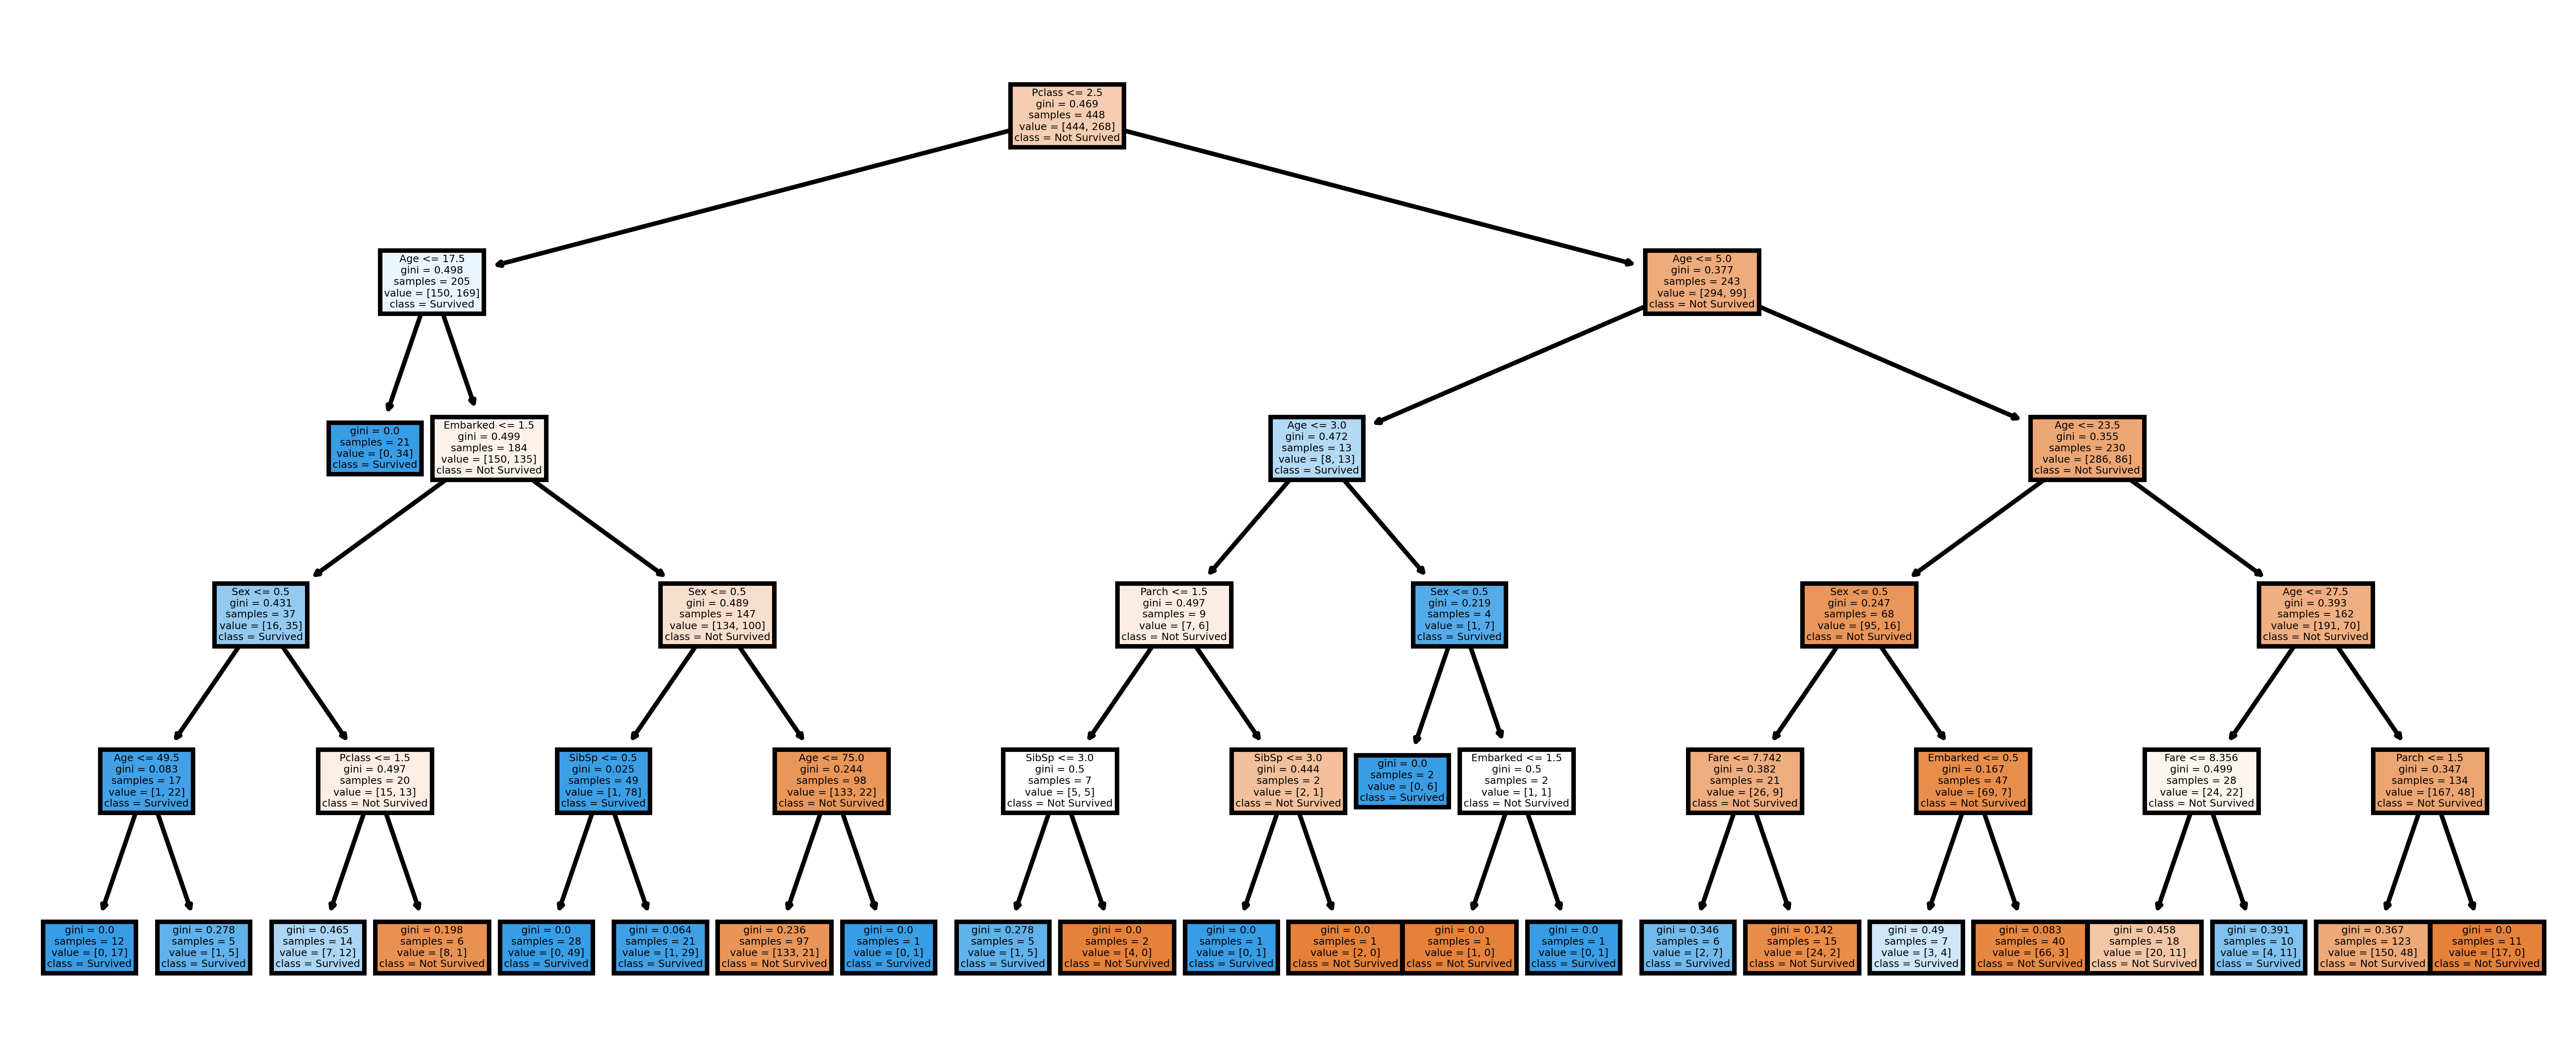

In [28]:
import matplotlib.pyplot as plt
from sklearn import tree

# Select one tree from the forest
chosen_tree = model.estimators_[0]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=800)
tree.plot_tree(chosen_tree,
               feature_names = X.columns, 
               class_names=['Not Survived', 'Survived'],
               filled = True);
fig.savefig('rf_individualtree.png')

In [29]:
x_samp=X_test.sample(1)
y_pred=model.predict(x_samp)
print(x_samp)
if y_pred[0]==0:
    print("Not Survived")
else:
    print("Survived")

     Pclass  Sex   Age  SibSp  Parch  Fare  Embarked
363       3    1  35.0      0      0  7.05         2
Not Survived
